In [4]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#import lucem_illud_2020 #pip install git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git

#All these packages need to be installed from pip
import requests #for http requests
import bs4 #called `beautifulsoup4`, an html parser
import pandas as pd #gives us DataFrames
#import docx #reading MS doc files, install as `python-docx`

#Stuff for pdfs
#Install as `pdfminer2`
# import pdfminer.pdfinterp
# import pdfminer.converter
# import pdfminer.layout
# import pdfminer.pdfpage

#These come with Python
import re #for regexs
import urllib.parse #For joining urls
import io #for making http requests look like files
import json #For Tumblr API responses
import os.path #For checking if files exist
import os #For making directories
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

In [9]:
# import PyPDF2
# pdfFileObj = open('NewWorker_2.pdf','rb')     #'rb' for read binary mode
# pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
# pdfReader.numPages

180

In [11]:
# from pdfminer.pdfparser import PDFParser
# from pdfminer.pdfdocument import PDFDocument
# from pdfminer.pdfpage import PDFPage
# from pdfminer.pdfpage import PDFTextExtractionNotAllowed
# from pdfminer.pdfinterp import PDFResourceManager
# from pdfminer.pdfinterp import PDFPageInterpreter
# from pdfminer.pdfdevice import PDFDevice
# from pdfminer.converter import TextConverter
# from pdfminer.layout import LAParams
# import unicodedata, codecs
# from io import StringIO

In [12]:
# def getPDFText(pdfFilenamePath):
#     retstr = StringIO()
#     parser = PDFParser(open(pdfFilenamePath,'r'))
#     try:
#         document = PDFDocument(parser)
#     except Exception as e:
#         print(pdfFilenamePath,'is not a readable pdf')
#         return ''
#     if document.is_extractable:
#         rsrcmgr = PDFResourceManager()
#         device = TextConverter(rsrcmgr,retstr, codec='ascii' , laparams = LAParams())
#         interpreter = PDFPageInterpreter(rsrcmgr, device)
#         for page in PDFPage.create_pages(document):
#             interpreter.process_page(page)
#         return retstr.getvalue()
#     else:
#         print(pdfFilenamePath,"Warning: could not extract text from pdf file.")
#         return ''

In [13]:
# words = getPDFText('NewWorker_2.pdf')

NewWorker_2.pdf is not a readable pdf


In [14]:
# with open('NewWorker.text','r') as f:
#     rawtext = f.readlines()

In [15]:
# module = ['卷首语\n','非虚构\n','小说\n','散文\n','诗歌\n']


['        2019.7.1\n',
 '双月刊\n',
 '· ·\n',
 '  1\n',
 ' 卢燕娟 人民文艺的发生 陈年喜 北方有佳物\n',
 '老  井 与煤对视\n',
 '邬  霞 梦中人\n',
 '徐良园\n',
 '徐良园 挖桩工\n',
 '刘  楠 中国农村的觉醒与重构 袁  凌 病房里的卖布大爷\n',
 '\n',
 ' 新工人文学\n',
 '文学双月刊 (每逢单月 1 日出刊)\n',
 '主编:范雨素、万华山\n',
 '编辑部主任:付秋云 编辑:许多、小海、郭福来、金红阳、徐良园、李若、易静、苑伟、王春玉 编委会成员:刘忱、李云雷、师力斌、王德志、鲁太光、西元、张慧瑜、袁凌、孟登\n',
 '迎、郭春林 志愿者编辑:汪子津、刘一然、刘雨嘉 封面“新工人文学”为师力斌书法作品 封面人物:徐良园 封面设计:王倩、万华山、小华\n',
 '承办单位:北京工友之家 & 皮村文学小组 地址:北京朝阳区金盏乡皮村工友之家 投稿邮箱:xingongrenwenxue51@163.com\n',
 '  《新工人文学》微信二维码:\n',
 '“皮村工友”微信二维码:\n',
 '  特别声明:\n',
 '本刊属内部刊物，仅供学习交流，不对外销售，如需转载请联系。\n',
 '2019/7/1\n',
 '\n',
 ' 卷首语\n',
 '魔幻的时代是写作者最好的营养品\n',
 '/ 范雨素\n',
 '今天，在这里，致答谢词。我在想创意写作四个字，我 个人的人生经历就是一次创意的写作。感觉自己如《安徒生 童话》里的丑小鸭变成了白天鹅，《格林童话》里的灰姑娘成 了王后一样。我是唐人奇幻小说《南柯太守传》里，在大槐树 下睡了一觉的赶考的农民。做了一场大梦。和黄粱美梦不同的 是，我的梦醒了，发现这不是梦，是真的。这是中国版的童 话吧。\n',
 '我从一个农妇，演绎成了一个著名作家。这算是中国版的 童话。现在老提固化两个字。说丁是丁卯是卯，都固化了，可 从我的经历看，并没有固化了。也诠释了二十四字的核心价值 观里的自由、平等四个字。\n',
 '刚刚我和魏思孝聊天，我们的改革开放四十年是一个魔 幻的时代。魏思孝笔下的吵架农妇、喝药的农妇，我认识的只 上了两年小学，每天要看玄幻小说，还要每走一步路都要用高 德地图领路的农妇，都是真实

In [2]:
H = []
C = []
content = []
with open('cleandata_2.txt','r') as f:
    for l in f:
        if l[:2]=='##':
            if len(content)>0:
                C.append(content)
            content = []
            H.append(l)
        else:
            content+=[l]
    C.append(content)

In [3]:
len(C)

27

In [31]:
H

['##\t非虚构\t病房里的卖布大爷\t袁凌\t\n',
 '##\t非虚构\t农村老人自杀现象\t李若\n',
 '##\t非虚构\t中国村庄的觉醒与重构\t刘楠\t\n',
 '##\t非虚构\t父亲的梦呓\t苏木清清\n',
 '##\t非虚构\t黄粱美梦\t陈榕\n',
 '##\t小说 \t绿鸟翻飞\t智啊威\n',
 '## 小说 \t乡村纳凉图景\t魏思孝\n',
 '## 小说 \t点唱机 郑在欢\n',
 '## 小说 \t梦中人\t邬霞\n',
 '## 小说 \t巫女河\t马大勇\n',
 '## 散文\t蓬头稚女乱翻书\t范雨素\n',
 '##\t散文\t一个家政女工与中介的斗争史\t尘埃\n',
 '##\t散文\t回忆和父亲在一起的日子\t金红阳\n',
 '##\t散文\t爸爸的病痛\t陈迪桥\n',
 '## 散文\t叫我如何面对你，曾经活力如飞鸟的少年\t郭福来\n',
 '##\t散文\t鲁迅故里的春色\t李彦(加拿大)\n',
 '## 散文\t北方有佳物\t陈年喜\n',
 '## 散文\t我的马儿肚子大\t屈松\n',
 '##\t散文\t异乡的月饼\t苑伟\n',
 '## 散文\t快递员的心思\t王春玉\n',
 '## 诗歌\t与煤对视\t老井\n',
 '## 诗歌\t观看打工春晚之前(外四首)\t师力斌\n',
 '## 诗歌\t当 \t许多\n',
 '## 诗歌\t挖桩工(外一首)\t徐良园\n',
 '## 诗歌\t一家小店的两面白墙\t\t万华山\n',
 '## 诗歌\t树洞(外一首)\t陈亮\n',
 '## 诗歌\t工人的家(外一首)\t小海\n']

In [6]:
# C_2 = []
# for a in C:
#     #C_2.append(" ".join(list(map(lambda x:x.strip('\n'), a))))
#     C_2.append(a)

AttributeError: 'list' object has no attribute 'strip'

In [7]:
C[1]

['临近清明节，我和母亲外出时路过南山 岗，一些村民在那儿挑土、上坟。纸钱烧得 青烟缭绕，人群中难得出现不少年轻人的身 影，是外出打工的青壮年们回来为祖上和已 故的亲人上坟。\n',
 '这在寥落的农村是罕见的景象。近些 年，村子里多是些年迈的老人带着幼小的孙 辈相依为命，有的村子规模较小，稀稀拉拉 地只剩下几个人。\n',
 '我们走到一处杂草丛生的坟地，坟脊敷 着一层薄薄的新土。母亲说，这座坟的主人 是上吊死的。我问母亲为什么，她告诉我， 老头的老伴去世后，两个儿子商量，老父亲 在兄弟俩家里轮流住，一家两个月。一次， 老人以为到日期了，背着铺盖卷从小儿子家 去大儿子家。刚走到大儿子家门口，碰巧大 儿子出门，奇怪地问他:爹，你怎么今天就 来了呢?原来那一个月有三十一天，离去大 儿子家还差一天。\n',
 '老头听见后，头也不回地回到自己家。\n',
 '第二天，被人发现在老屋悬梁自尽。 我很震惊。从北京回村子还不到一年时 间，这已经是我听说和亲历的第四起老人非\n',
 '正常死亡的事件。\n',
 '一\n',
 '2018 年岁末，我去叔叔家探望小娘 (婶婶)。她六十五岁，已经被疾病困扰了十\n',
 '多年。 那天，我坐在床头，一边打毛衣一边\n',
 '同小娘聊天，她说:“医生让我去大医院看。 我哪家医院也不想去，早受够了，想早点上 蒿儿山。”嵩儿山是村里的坟山。\n',
 '我劝她不要瞎想。明年开春时，天气暖 和，就又和好人一样。小娘说:“你不知道 我有多难受，活着受罪。”\n',
 '我问小娘怎么个难受法，她自己也说 不上来。十几年前，她开始浑身使不上力 气，无法做重体力活。村里有妇女组织帮别 人插秧，一百元一天，小娘参加了几次，因\n',
 '006\n',
 '\n',
 '为“像包不住心一样”不得不停止。再来喊 她，她说:“我倒想去呢，可身体把我管住 了。”那时叔叔做生意失败，原本富裕的家 境一落千丈，全家人靠他一人在建筑工地打 工为生。\n',
 '为了治病，叔叔一家四处求医，检查 的医院不断升级，各医院的检查结果也不一 样。起初，医生说是冠心病，后来也有医生 说是神经官能症、风湿性心脏病......一年有 一半时间，小娘都在医院，一拿药就是一大 包、吊水一次就是三四瓶，但病总是无法 根治。\n',
 '2011 年夏天，小娘犯了病，叔叔在外 

In [42]:
C_2[3]

'小时候，我和父母睡在一张炕上。每 晚睡觉总会听到父亲喊得响亮的梦话。有时 是一声笑，或一声哭，或唱一句戏词;但大 多时候我和母亲听到的是一声长叹——哎呀 呀——悔......再就是把牙咬得咯吱吱响。母 亲恨恨地说;不是咳嗽就是说梦话，还让人 睡觉不!偶尔在晚上听到父亲哭得伤心，摇 醒父亲，父亲总是摇摇头，长叹一声后，又 转身睡去。每当我问起父亲“悔”什么，父 亲避而不答。 父亲吃饭速度极快，吃完饭就开始干 活。头一挨着枕头就能睡着。我常劝父亲吃 饭慢些，吃得快了对肠胃不好。父亲嘴上应 着，却慢不下来，多年习惯成自然了。父亲 耳聋，和人聊天时，只会看着别人的嘴，随 着别人的表情点头或摇头，听不清看不明时 往往会惹出一些笑话。因此，母亲总会给父 亲安排满满当当的活计，即便在农闲的冬 季，父亲也是早出晚归的出去拾柴。在我家 的小院常年堆积着小山一样高的柴垛，火车 皮一样占掉了整个狭长的院心。我们家很少 买煤。每次做饭烧火时总会被混进柴禾里的 刺扎着手，还会沾一身土灰。少不更事的我 很羡慕大哥家生的炉子。大我四岁和大我一 岁的两个侄女不用烧柴，还能把火熨斗放在 火炉上烧热，垫上湿布把衣服熨得笔直。还 能在炉火上炒菜。我们家很少炒菜，大多因 为烧柴炒菜不方便，也为省油。父亲爱吃炒 菜，常被母亲大声说没本事还嘴馋。继而是 一堆怨气:你自己没本事倒罢了，让我的孩 子们也跟着你受罪。父亲听了也不争辩，或 叹气，或低头不语。我体谅母亲的苦衷，知 道父亲也是体谅母亲的。母亲心情好时会自 嘲着对串门的叔叔婶婶们说:看我家的柴 (财)多不!不发财都不行!母亲好客，在 我们家盖的门房里砌了一个大炕，占门房总 面积的三分之一。每有亲戚来家小住，总会 让父亲把大炕烧得热乎乎的。 一 ·非虚构· 017   二 那时家里有一台弹棉花机，父亲年少体弱， 父亲原本有一个不错的家庭。太爷爷 奋斗了一份大得能够上地主的家业，因不识 字在字据上常会受人欺骗，便下狠心让爷 爷兄弟三人读书。除了三爷爷三科死活不 念书外，爷爷榜科和二爷爷杰山同时考入 北京一所大学。在大学里爷爷与二爷爷更 名“文汉”、“武汉”，务农的三爷爷更名为 “左汉”。我问父亲，爷爷上的是啥学校?父 亲自豪地笑了，说爷爷上的是北京最好最高 的学校，在乡里敲锣打鼓放过炮的。(大哥 听老人们说，爷爷与二爷爷上的是北京师范 大学，原名为京师大学堂

In [5]:
def load_stopword(filename):
    '''
    加载停止词
    :return:
    '''
    with open(filename,'r',encoding='utf-8') as f:
        stopword = [line.strip() for line in f]
    return stopword

def extract(contents, stopword):
    '''
    用正则表达式去除无用内容以及停止词，保留有用的内容
    :param contents: list
    :param stopword: list
    :return:
    '''
    extracted_contents = []
    for content in contents:
        extracted_words = []
        content = str(content).strip()
        re_h = re.compile('</?\w+[^>]*>')
        re_nbsp = re.compile('&nbsp;')
        content = re_h.sub('', content)
        content = re_nbsp.sub('', content)
        words = jieba.lcut(content)
        for w in words:
            w = re.sub("[\s+\.\!\/_,$%^*(+\"\'“”《》?“]+|[+——！，。？、~@#￥%……&*（）：]+", "", w)
            if len(w)>0 and w not in stopword:
                extracted_words.append(w)
        #if len(extracted_words) > 0:
        extracted_contents.append(extracted_words)
    return extracted_contents

In [6]:
stopword = load_stopword('stopword.txt')

In [8]:
import jieba
import gensim as gensim
import re

In [21]:
sentence_all = []
for a in C:
    extract_content = extract(a,stopword)
#     sentence = []
#     for each in extract_content:
#         sentence.extend(each)
    sentence_all.append(extract_content)

In [24]:
len(sentence_all)

27

In [25]:
content_df = pd.DataFrame({'Header':H,'Sentences':sentence_all})

In [26]:
content_df.head()

,Header,Sentences
0,##\t非虚构\t病房里的卖布大爷\t袁凌\t\n,"[[], [出院, 那天, 袁, 大爷], [病房, 换, 垃圾筒, 拾, 掇, 厕所, 印..."
1,##\t非虚构\t农村老人自杀现象\t李若\n,"[[临近, 清明节, 母亲, 外出, 时, 路过, 南山, 岗, 村民, 挑土, 上坟, 纸..."
2,##\t非虚构\t中国村庄的觉醒与重构\t刘楠\t\n,"[[写, 此文, 时, 手边, 放着, 雷蒙, 威廉斯, 乡村, 城市, 书中, 写, 城市..."
3,##\t非虚构\t父亲的梦呓\t苏木清清\n,"[[小时候, 父母, 睡, 一张, 炕, 晚, 睡觉, 总会, 听到, 父亲, 喊, 响亮,..."
4,##\t非虚构\t黄粱美梦\t陈榕\n,"[[胖嫂, 门前, 聚集, 热闹非凡, 俱乐部, 男人, 外出, 务工, 牌, 场上, 备战..."


In [9]:
H2 = []
C2 = []
content = []
with open('clean_data_3.txt','r') as f:
    for l in f:
        if l[:2]=='##':
            if len(content)>0:
                C2.append(content)
            content = []
            H2.append(l)
        else:
            content+=[l]
    C2.append(content)

In [20]:
len(C2)

1

In [10]:
sentence_all = []
for a in C2:
    extract_content = extract(a,stopword)
#     sentence = []
#     for each in extract_content:
#         sentence.extend(each)
    sentence_all.append(extract_content)

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/85/gxdhh_5d1pn01skrdcsvwd9h0000gn/T/jieba.cache
Loading model cost 0.637 seconds.
Prefix dict has been built successfully.


In [11]:
np.sum(list(map(len, C2[0])))# how many characters are here

462847

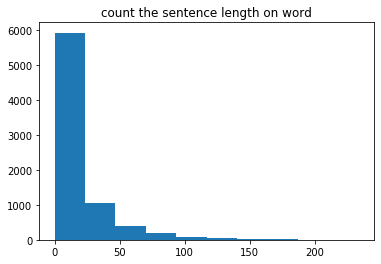

In [20]:
plt.hist(list(map(len, sentence_all[0])))
plt.title('count the sentence length on word')
plt.show()

In [21]:
pd.Series(list(map(len, sentence_all[0]))).describe()

count    7708.000000
mean       16.526077
std        24.278620
min         0.000000
25%         2.000000
50%         6.000000
75%        21.000000
max       234.000000
dtype: float64

In [13]:
s_sum = []
for s in sentence_all[0]:
    s_sum += s
    
len(s_sum)# how mamy sentence are here

127383

In [22]:
a = Counter(s_sum)

In [16]:
sorted(a.items(),key = lambda x:x[1])[:10], sorted(a.items(),key = lambda x:x[1])[::-1][:10]

([('20199', 1),
  ('徐婉珍', 1),
  ('蔷', 1),
  ('吕', 1),
  ('排版', 1),
  ('昭告', 1),
  ('边画', 1),
  ('一个圈', 1),
  ('1992', 1),
  ('边写', 1)],
 [('说', 1654),
  ('里', 648),
  ('工人', 511),
  ('五月', 503),
  ('中', 496),
  ('年', 431),
  ('想', 422),
  ('新', 422),
  ('做', 420),
  ('父亲', 403)])

# Construct the pmi network

In [45]:
import networkx as nx
import itertools
from collections import defaultdict
import sys
def flushPrint(d):
    sys.stdout.write('\r')
    sys.stdout.write(str(d))
    sys.stdout.flush()

In [24]:
Wid = {n:i for n,i in zip(list(a.keys()), list(range(len(a))))}

In [25]:
len(Wid)

31506

In [32]:
W = defaultdict(int)
for s in sentence_all[0]:
    s_ = sorted(list(set([Wid[w] for w in s])))
    for i,j in itertools.combinations(s_, 2):
        W[(i,j)] += 1

In [60]:
WN = nx.Graph()
for i,j in W:
    WN.add_edge(i,j,weight = W[(i,j)])

In [41]:
nx.is_connected(WN),nx.density(WN)

(False, 0.004011939033917925)

In [35]:
w_c = list(nx.connected_components(WN))

In [39]:
len(w_c),len(w_c[0])

(39, 31252)

In [38]:
for i in w_c:
    print(len(i))

31252
2
2
2
3
2
3
3
5
2
2
4
2
3
3
3
3
3
3
2
2
2
2
3
2
3
8
4
3
2
2
2
3
2
3
2
2
2
2


In [40]:
N = 2*WN.size(weight = 'weight')
K = {i: WN.degree(weight='weight')[i] for i in WN}

In [46]:
len(WN)

31355

In [57]:
sorted(W.items(),key = lambda x:x[1])[:10]

[((15, 16), 1),
 ((17, 18), 1),
 ((17, 19), 1),
 ((17, 20), 1),
 ((17, 21), 1),
 ((17, 22), 1),
 ((17, 23), 1),
 ((17, 24), 1),
 ((17, 25), 1),
 ((18, 19), 1)]

In [53]:
N

4459416.0

In [59]:
W[(13,2071)],WN[13][2071]['weight']

2

In [62]:
P = nx.Graph()
n = 0
for i in WN:
    n += 1
    if n%100 ==0:
        flushPrint(n/100)
    for j in WN[i]:
        
        wij = WN[i][j]['weight']
        pmi = np.log2(N*wij/(K[i]*K[j]))
        P.add_edge(i,j,weight = pmi)

313.0

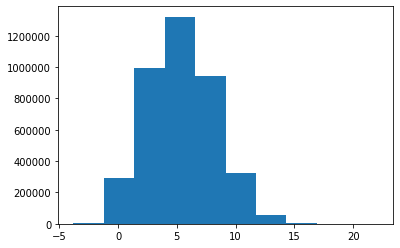

In [64]:
weight = [P[i][j]['weight'] for i in P for j in P[i]]
plt.hist(weight)
plt.show()

In [65]:
x = dict(P.degree())
y = dict(P.degree(weight = 'weight'))
z = {i:y[i]/x[i] for i in x}

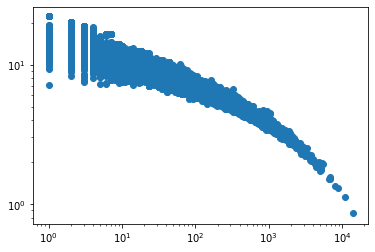

In [67]:
X = [x[i] for i in x]
Z = [z[i] for i in x]
plt.scatter(X,Z)
plt.xscale('log')
plt.yscale('log')
plt.show()

In [68]:
idW = {Wid[w]:w for w in Wid}

In [74]:
[(idW[i],p) for i, p in sorted(z.items(), key = lambda x:x[1])[::-1][:20]]

[('弹壳', 22.088423358153587),
 ('摸出', 22.088423358153587),
 ('价格表', 22.088423358153587),
 ('品类', 22.088423358153587),
 ('残余', 22.088423358153587),
 ('回头路', 22.088423358153587),
 ('挖银', 22.088423358153587),
 ('挖金', 22.088423358153587),
 ('特对', 22.088423358153587),
 ('蚊否', 22.088423358153587),
 ('肌体', 22.088423358153587),
 ('触及', 22.088423358153587),
 ('显形', 22.088423358153587),
 ('变化莫测', 22.088423358153587),
 ('噶尔', 22.088423358153587),
 ('丹', 22.088423358153587),
 ('航线', 22.088423358153587),
 ('自已', 22.088423358153587),
 ('帆船', 22.088423358153587),
 ('出海', 22.088423358153587)]

In [77]:
[(idW[i],p) for i, p in sorted(z.items(), key = lambda x:x[1])[:20]]

[('说', 0.8610541095592696),
 ('里', 1.115045552879978),
 ('中', 1.3028471243549513),
 ('时', 1.3514668615353123),
 ('做', 1.5028470154281965),
 ('想', 1.5100858210568788),
 ('年', 1.5520984505272633),
 ('新', 1.7324051692166211),
 ('生活', 1.7473448202675728),
 ('家', 1.790073049869258),
 ('工人', 1.8582125943747105),
 ('两个', 1.9257735355146712),
 ('走', 1.9420539781705528),
 ('工作', 1.947039865333682),
 ('中国', 1.9511093957030745),
 ('吃', 1.958398160119067),
 ('月', 1.9920415433056349),
 ('钱', 2.0171215293382327),
 ('打工', 2.0227144524507583),
 ('写', 2.0251821852134286)]

In [73]:
P_ = {(i,j): P[i][j]['weight'] for i in P for j in P[i]}

In [79]:
[(idW[pair[0]], idW[pair[1]], p) for pair, p in sorted(P_.items(), key = lambda x:x[1])[:20]]

[('中国', '钱', -3.7915457586965466),
 ('钱', '中国', -3.7915457586965466),
 ('新', '父亲', -3.4054241221381814),
 ('父亲', '新', -3.4054241221381814),
 ('工人', '买', -3.1367835638476174),
 ('买', '工人', -3.1367835638476174),
 ('母亲', '工人', -3.13183661063765),
 ('工人', '母亲', -3.13183661063765),
 ('中', '想起', -3.1311178709747094),
 ('想起', '中', -3.1311178709747094),
 ('文学', '走', -3.1106690241840083),
 ('走', '文学', -3.1106690241840083),
 ('月', '找', -3.079472771205299),
 ('找', '月', -3.079472771205299),
 ('新', '完', -3.077556092213667),
 ('完', '新', -3.077556092213667),
 ('新', '钱', -3.0677798917725467),
 ('钱', '新', -3.0677798917725467),
 ('中', '告诉', -3.0451766995636658),
 ('告诉', '中', -3.0451766995636658)]

In [80]:
[(idW[pair[0]], idW[pair[1]], p) for pair, p in sorted(P_.items(), key = lambda x:x[1])[::-1][:20]]

[('弹壳', '摸出', 22.088423358153587),
 ('摸出', '弹壳', 22.088423358153587),
 ('价格表', '品类', 22.088423358153587),
 ('品类', '价格表', 22.088423358153587),
 ('残余', '回头路', 22.088423358153587),
 ('回头路', '残余', 22.088423358153587),
 ('挖银', '挖金', 22.088423358153587),
 ('挖金', '挖银', 22.088423358153587),
 ('特对', '蚊否', 22.088423358153587),
 ('蚊否', '特对', 22.088423358153587),
 ('肌体', '触及', 22.088423358153587),
 ('触及', '肌体', 22.088423358153587),
 ('显形', '变化莫测', 22.088423358153587),
 ('变化莫测', '显形', 22.088423358153587),
 ('噶尔', '丹', 22.088423358153587),
 ('丹', '噶尔', 22.088423358153587),
 ('航线', '自已', 22.088423358153587),
 ('自已', '航线', 22.088423358153587),
 ('帆船', '出海', 22.088423358153587),
 ('出海', '帆船', 22.088423358153587)]

# construct W2V

In [28]:
data = content_df['Sentences'].sum()
model = gensim.models.word2vec.Word2Vec(size = 300, alpha=0.2,
                                    window= 1,min_count=1,
                                    negative=2,hs=0,compute_loss = True)
model.build_vocab(data)

In [29]:
len(model.wv.vocab)

12088

In [30]:
model.train(data,total_examples=len(data),epochs = 100)

(3528622, 3654200)

In [40]:
model.most_similar('门前')

[('人送', 0.7383615374565125),
 ('挑头', 0.7107774019241333),
 ('手抱', 0.6575748920440674),
 ('隐藏', 0.6540506482124329),
 ('谋生', 0.6466891765594482),
 ('完美', 0.6454121470451355),
 ('骄傲地', 0.6396452784538269),
 ('拖累', 0.6346744298934937),
 ('几趟', 0.6316347718238831),
 ('你会弹', 0.6302877068519592)]